In [275]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np
import random

In [276]:
def draw_tmp(object): #描画するobjectをaxesに追加
    axes.add_patch(object)

In [277]:
class Circle():
    def __init__(self, center, radius):
        self.center = center #円の中心座標(Point型)をインスタンス変数に設定
        self.radius = radius #円の半径(float型)をインスタンス変数に設定
    
    def debag_draw(self): #デバッグ用
        patch = patches.Circle(xy=(self.center.x, self.center.y), radius=self.radius, fc='g', ec='r')#fc:face color, ec:edge color
        draw_tmp(patch)
    

In [278]:
class Point():
    def __init__(self, x, y, temperature):
        self.x = x
        self.y = y
        self.temp = temperature
    
    def equals(self,point): #点の一致
        if self.x == point.x and self.y == point.y :
            return True
        else:
            return False
        
    def distance(self, Point): #点間の距離
        distance = math.sqrt(math.pow((self.x - Point.x),2) + math.pow((self.y - Point.y),2))
        return distance
    
    def debag_draw(self, axes): #デバッグ用
        axes.plot(self.x, self.y, marker= '.', color='g', markersize=5)
        #c = patches.Circle(xy=(self.center.x, self.center.y), radius=0, fc='g', ec='r')#fc:face color, ec:edge color
        #draw(c)
        

In [279]:
class Triangle():
    def __init__(self, point1, point2, point3):
        self.point1 = point1
        self.point2 = point2
        self.point3 = point3
    
    def equals(self, object): #三角形の一致
        if (self.point1==object.point1 and self.point2==object.point2 and self.point3==object.point3)\
           or (self.point1==object.point1 and self.point2==object.point3 and self.point3==object.point2)\
           or (self.point1==object.point2 and self.point2==object.point1 and self.point3==object.point3)\
           or (self.point1==object.point2 and self.point2==object.point3 and self.point3==object.point1)\
           or (self.point1==object.point3 and self.point2==object.point1 and self.point3==object.point2)\
           or (self.point1==object.point3 and self.point2==object.point2 and self.point3==object.point1):
            return True
        else:
            return False
    
    #def hash
    
    def debag_draw(self):
        points = [[self.point1.x, self.point1.y], [self.point2.x, self.point2.y], [self.point3.x, self.point3.y]]
        patch = patches.Polygon(xy=points, closed=True)
        draw_tmp(patch)
        
    def hascommon(self, object): #三角形が他の三角形と共有点を持つか
        if self.point1.equals(object.point1) or self.point1.equals(object.point2) or self.point1.equals(object.point3) \
           or self.point2.equals(object.point1) or self.point2.equals(object.point2) or self.point2.equals(object.point3) \
           or self.point3.equals(object.point1) or self.point3.equals(object.point2) or self.point3.equals(object.point3):
            return True
        else:
            return False
                

In [286]:
class DelaunayTriangles():
    def __init__(self, pointList, upperleft, bottomright):
        self.hugeTriangle = self.__opengetHugeTriangle(upperleft, bottomright)
        self.triangleset = []
        #print(type(self.hugeTriangle))
        self.triangleset.append(self.hugeTriangle)
        #print(self.triangleset) 
        self.pointList = pointList
        self.remove = []
    def DelaunayTriangulation(self,upperleft, bottomright):
        for point in self.pointList:
            removetriangle = []
            remove_2 = []
            tmptriangleset = [] 
            
            for triangle in self.triangleset:
                circum = self.__getCircumscribedCirclesOfTriangle(triangle)                
                if point.distance(circum.center) <= circum.radius:
                    self.__addElementToRedundanciesMap(tmptriangleset, Triangle(point, triangle.point1, triangle.point2))
                    self.__addElementToRedundanciesMap(tmptriangleset, Triangle(point, triangle.point1, triangle.point3))
                    self.__addElementToRedundanciesMap(tmptriangleset, Triangle(point, triangle.point2, triangle.point3))
                    remove_2.append(triangle)
    
            for remove in remove_2:
                self.triangleset.remove(remove)
                
            i = 0
            while i< len(tmptriangleset)-1:
                flg = 0 
                removetriangle2 = []
                
                for next in tmptriangleset[(i+1):]:
                    if tmptriangleset[i].equals(next):
                        flg += 1                      
                        removetriangle2.append(next)
                        break
                        
                if flg >= 1:
                        removetriangle.append(tmptriangleset[i])
                for a in removetriangle2:
                    tmptriangleset.remove(a)
                i += 1
                
            for removetriangles in removetriangle:
                tmptriangleset.remove(removetriangles)
            
            for tmptriangle in tmptriangleset:
                self.triangleset.append(tmptriangle)
        
        for triangle in self.triangleset:
            if triangle.hascommon(self.hugeTriangle):
                self.remove.append(triangle)
                
        for removes in self.remove:
            self.triangleset.remove(removes) 
        
            
        
        return self.triangleset
                    
    def addpoint(self, addpoint):
        self.pointList.append(addpoint)
        
        for re_add in self.remove:  
            self.triangleset.append(re_add)
            
        removetriangle = []
        remove_2 = []
        tmptriangleset = [] 
        
        for triangle in self.triangleset:
            circum = self.__getCircumscribedCirclesOfTriangle(triangle)
            if addpoint.distance(circum.center) <= circum.radius:
                self.__addElementToRedundanciesMap(tmptriangleset, Triangle(addpoint, triangle.point1, triangle.point2))
                self.__addElementToRedundanciesMap(tmptriangleset, Triangle(addpoint, triangle.point1, triangle.point3))
                self.__addElementToRedundanciesMap(tmptriangleset, Triangle(addpoint, triangle.point2, triangle.point3))
                remove_2.append(triangle)
        
        for remove in remove_2:
            self.triangleset.remove(remove)
    
        i = 0
        while i< len(tmptriangleset)-1:
            flg = 0 
            removetriangle2 = []
            
            for next in tmptriangleset[(i+1):]:
                 if tmptriangleset[i].equals(next):
                    flg += 1
                    removetriangle2.append(next)
                    break
               
            if flg >= 1:
                    removetriangle.append(tmptriangleset[i])
            for a in removetriangle2:
                tmptriangleset.remove(a)
            i += 1
            
        for removetriangles in removetriangle:
            tmptriangleset.remove(removetriangles)
            
        for tmptriangle in tmptriangleset:
            self.triangleset.append(tmptriangle)
    
        self.remove.clear()    
        
        for triangle in self.triangleset:
            if triangle.hascommon(self.hugeTriangle):
                self.remove.append(triangle)
                
        for removes in self.remove:
            self.triangleset.remove(removes) 
    
        return self.triangleset
                    
    def removepoint(self,removepoint):
        for point in self.pointList:
            if point.equals(removepoint):
                print("true")
                self.pointList.remove(point)
                break
                
        self.triangleset.clear()
        self.triangleset.append(self.hugeTriangle)
        self.remove.clear()
        
        for point in self.pointList:
            removetriangle = []
            remove_2 = []
            tmptriangleset = [] 
            
            for triangle in self.triangleset:
                circum = self.__getCircumscribedCirclesOfTriangle(triangle)
                if point.distance(circum.center) <= circum.radius:
                    self.__addElementToRedundanciesMap(tmptriangleset, Triangle(point, triangle.point1, triangle.point2))
                    self.__addElementToRedundanciesMap(tmptriangleset, Triangle(point, triangle.point1, triangle.point3))
                    self.__addElementToRedundanciesMap(tmptriangleset, Triangle(point, triangle.point2, triangle.point3))
                    remove_2.append(triangle)
                
            for remove in remove_2:
                self.triangleset.remove(remove)
            
            i = 0
            while i< len(tmptriangleset)-1:
                flg = 0 
                removetriangle2 = []
                
                for next in tmptriangleset[(i+1):]:
                    if tmptriangleset[i].equals(next):
                        flg += 1
                        removetriangle2.append(next)
                        break
        
                if flg >= 1:
                        removetriangle.append(tmptriangleset[i])
                for a in removetriangle2:
                    tmptriangleset.remove(a)
                i += 1
            
            for removetriangles in removetriangle:
                tmptriangleset.remove(removetriangles)
            
            for tmptriangle in tmptriangleset:
                self.triangleset.append(tmptriangle)
    
        for triangle in self.triangleset:
            if triangle.hascommon(self.hugeTriangle):
                self.remove.append(triangle)
                
        for removes in self.remove:
            self.triangleset.remove(removes) 
        
        return self.triangleset
    
    def movepoint(self, delete, add):
        for point in self.pointList:
            if point.equals(delete):
                self.pointList.remove(point)
                break
                
        self.pointList.append(add) 
        self.triangleset.clear()
        self.triangleset.append(self.hugeTriangle)
        self.remove.clear()
        
        for point in self.pointList:
            removetriangle = []
            remove_2 = []
            tmptriangleset = [] 
            
            for triangle in self.triangleset:
                circum = self.__getCircumscribedCirclesOfTriangle(triangle)
                if point.distance(circum.center) <= circum.radius:
                    self.__addElementToRedundanciesMap(tmptriangleset, Triangle(point, triangle.point1, triangle.point2))
                    self.__addElementToRedundanciesMap(tmptriangleset, Triangle(point, triangle.point1, triangle.point3))
                    self.__addElementToRedundanciesMap(tmptriangleset, Triangle(point, triangle.point2, triangle.point3))
                    remove_2.append(triangle)
            
            for remove in remove_2:
                self.triangleset.remove(remove)
            
            i = 0
            
            while i< len(tmptriangleset)-1:
                flg = 0 
                removetriangle2 = []
                
                for next in tmptriangleset[(i+1):]:
                    if tmptriangleset[i].equals(next):
                        flg += 1
                        removetriangle2.append(next)
                        break
               
                if flg >= 1:
                        removetriangle.append(tmptriangleset[i])
                        
                for a in removetriangle2:
                    tmptriangleset.remove(a)
                i += 1
               
            for removetriangles in removetriangle:
                tmptriangleset.remove(removetriangles)
            
            for tmptriangle in tmptriangleset:
                self.triangleset.append(tmptriangle)
           
        for triangle in self.triangleset:
            if triangle.hascommon(self.hugeTriangle):
                self.remove.append(triangle)
                
        for removes in self.remove:
            self.triangleset.remove(removes) 
        
        return self.triangleset
            
                
                
    def __addElementToRedundanciesMap(self,tmptriangleset, triangle):
        tmptriangleset.append(triangle)
    
    
    def __opengetHugeTriangle(self, upperleft, bottomright): 
        if bottomright.x < upperleft.x: #正しく右上, 左下にPointが設定されていない場合
            tmp = bottomright.x
            bottomright.x = upperleft.x
            upperleft.x = tmp
        
        if bottomright.y < upperleft.y:
            tmp = bottomright.y
            bottomright.y = upperleft.y
            upperleft.y = tmp
        
        center = Point((bottomright.x - upperleft.x)/2, (bottomright.y - upperleft.y)/2, 0 ) #長方形を包括する円の中心座標
        radius = center.distance(upperleft) + 1 #長方形を包括する円の半径
        
        #円に外接する三角形
        x1 = center.x - math.sqrt(3)*radius
        y1 = center.y - radius
        point1 = Point(x1, y1, 0)
        
        x2 = center.x + math.sqrt(3)*radius
        y2 = center.y - radius
        point2 = Point(x2, y2, 0)
        
        x3 = center.x
        y3 = center.y + 2*radius
        point3 = Point(x3, y3, 0)
        
        hugeTriangle = Triangle(point1, point2, point3)

        return hugeTriangle
    
    def __getCircumscribedCirclesOfTriangle(self, triangle): #三角形の外接円を求める
        #print(type(triangle))
        x1 = triangle.point1.x
        y1 = triangle.point1.y
        
        x2 = triangle.point2.x
        y2 = triangle.point2.y
        
        x3 = triangle.point3.x
        y3 = triangle.point3.y
        
        c = 2 * ((x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1))
       # print("c:", c)
        x = ((y3 - y1) * (x2 * x2 - x1 * x1 + y2 * y2 - y1 * y1) + (y1 - y2) * (x3 * x3 - x1 * x1 + y3 * y3 - y1 * y1))/c
        y = ((x1 - x3) * (x2 * x2 - x1 * x1 + y2 * y2 - y1 * y1) + (x2 - x1) * (x3 * x3 - x1 * x1 + y3 * y3 - y1 * y1))/c
        
        center = Point(x, y, 0)
    
        radius = triangle.point1.distance(center)
        
        circle = Circle(center, radius)
        
        return circle            
                    
                

In [287]:
def coloring(temp):
   # if temp < -10 :
    #    color = 'slategray'
    #    alpha = -(-20-temp)/10
    #elif temp < 0 :
    #    color = 'lightsteelblue'
    #    alpha = -(-10-temp)/10
  #  elif temp < 10 :
      #  color = 'seagreen'
      #  alpha = (temp-0)/10
  #  elif temp < 20 :
      #  color = 'darkseagreen'
      #  alpha = (temp-10)/10
   # elif temp < 30 :
      #  color = 'pink'
       # alpha = (temp-20)/10
   # else:
      #  color = 'brown'
       # alpha = (temp-30)/10
    if temp < 10: #-10度から10度
        #color = 'lightsteelblue'
        color = '#455765'
        alpha = (10 - temp)/20
    else: #11度から30度
        color = '#b88884'
        alpha = (temp - 10)/20
    return [color, alpha]
        

In [288]:
def add(delaunaytriangles, xy_list, temperature):
    addpoint = Point(xy_list[0], xy_list[1], temperature)
    triangleset = delaunaytriangles.addpoint(addpoint)
    
    return triangleset

In [289]:
def remove(delaunaytriangles, xy_list):
    removepoint = Point(xy_list[0], xy_list[1], 0)
    triangleset = delaunaytriangles.removepoint(removepoint)
    
    return triangleset

In [290]:
def move(delaunaytriangles,del_xy_list, add_xy_list, add_temperature):
    delete = Point(del_xy_list[0], del_xy_list[1], 0)
    
    add = Point(add_xy_list[0], add_xy_list[1], add_temperature)
    triangleset = delaunaytriangles.movepoint(delete, add)
    
    return triangleset

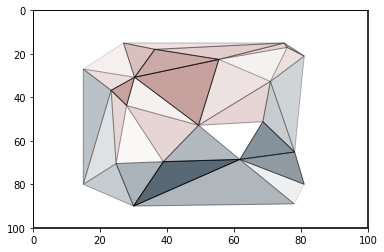

In [313]:
def main():
    #スクリーン
    figure = plt.figure()
    axes = plt.axes()
    #axes.invert_yaxis()
    #axes.set_xlim(0,1000)
    #axes.set_ylim(1000,0)
    axes.set_xlim(0,100)
    axes.set_ylim(100,0)
    A = np.array([0,0])
    B = np.array([100,0])
    C = np.array([100,100])
    D = np.array([0,100])
    
    patch1 = patches.Polygon(xy = [A,B,C,D],
                edgecolor='black',
                facecolor='white',
                linewidth=1.6)
    
    axes.add_patch(patch1)
    
    #点のリスト
    plotlist = []
    #edge point
    point = Point(15, 27, 0)
    plotlist.append(point)
    point = Point(27,15 , 0)
    plotlist.append(point)
    point = Point(15, 80, 0)
    plotlist.append(point)
    point = Point(30, 90, 0)
    plotlist.append(point)
    point = Point(78, 89, 20)
    plotlist.append(point)
    point = Point(81, 80, 20)
    plotlist.append(point)
    point = Point(75, 15, 20)
    plotlist.append(point)
    point = Point(81, 21, 20)
    plotlist.append(point)
    
    for counter in range(13):
        point = Point(random.uniform(15,80), random.uniform(15,80), random.uniform(-20,40) )
        plotlist.append(point)
        
    #スクリーンの左上,右下のPoint(upperleft, bottomrightの指定)
    upperleft = Point(0,0, -20)
    bottomright = Point(100,100, 30)
    xy_list = [4, 4]
    
   #三角形分割
    delaunaytriangles = DelaunayTriangles(plotlist, upperleft, bottomright)
    triangleset = delaunaytriangles.DelaunayTriangulation(upperleft, bottomright)
    
#add
    #xy_list = [1, 1]
    #temperature = 20
    #triangleset = add(delaunaytriangles, xy_list, temperature)
    
#remove 
    #xy_list = [1, 1]
    #triangleset = remove(delaunaytriangles, xy_list)
#move
    #del_xy_list = [1, 1]
    #add_xy_list = [99,99]
    #add_temperature = 20
    #triangleset = move(delaunaytriangles, del_xy_list, add_xy_list,add_temperature )
    
    for triangle in triangleset:
        points = [[triangle.point1.x, triangle.point1.y], [triangle.point2.x, triangle.point2.y], [triangle.point3.x, triangle.point3.y]]
        color = coloring((triangle.point1.temp + triangle.point2.temp + triangle.point3.temp)/3)
        patch2 = patches.Polygon(xy=points, closed=True, edgecolor='black',
                facecolor=color[0], alpha = color[1])
        axes.add_patch(patch2)
           
    plt.show()

main() 
    
    